In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange
from scipy import random, linalg
from scipy import linalg as la
import csv

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

USING COVARIANCE MATRIX
eigenvalues:
 [ 2.58977708e+01 -8.06388799e-16  2.04317183e+00] 

matrix of eigenvectors:
 [[-0.11239945 -0.81649658  0.56630354]
 [-0.5811779  -0.40824829 -0.70396419]
 [-0.8059768   0.40824829  0.42864289]] 

USING SVM
eigenvalues:
 [2.58977708e+01 2.04317183e+00 2.76977178e-15] 

matrix of eigenvectors:
 [[-0.11239945  0.56630354  0.81649658]
 [-0.5811779  -0.70396419  0.40824829]
 [-0.8059768   0.42864289 -0.40824829]] 

Lambda:
 [[ 2.58977708e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.06388799e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.04317183e+00]] 

we retain 0.93% of the total variability
with the dimensionality reduce we get 1.00%


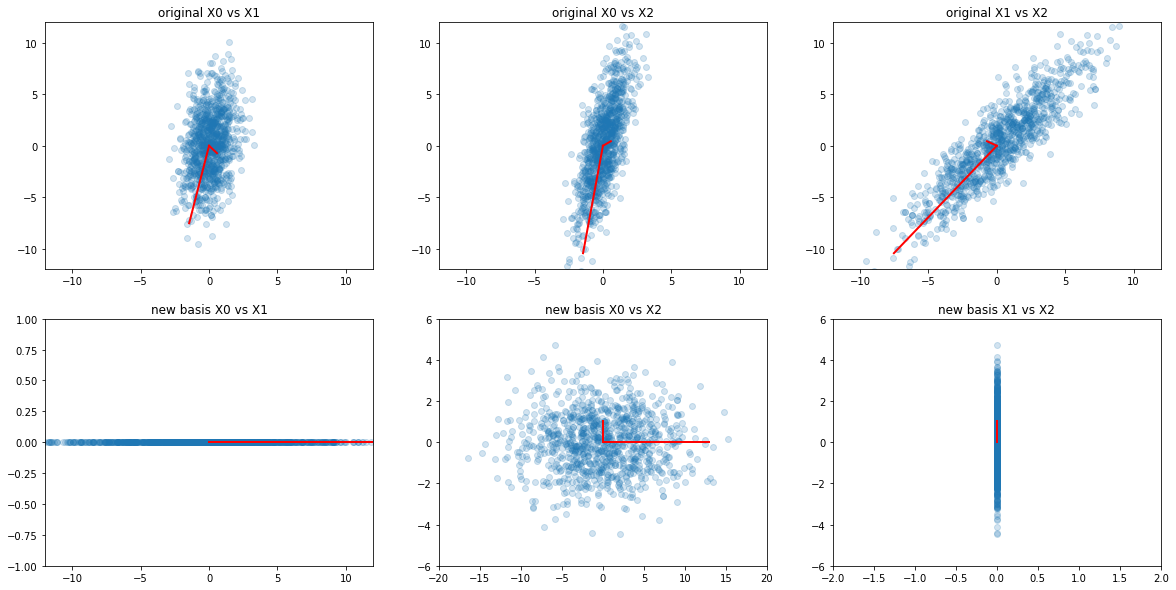

In [11]:
N = 1000
x0 = np.random.normal(0,1,N)
x1 = x0 + np.random.normal(0,3,N)
x2 = 2*x0 + x1
######### 1 #######
M = np.array((x0,x1,x2))
A = np.cov(M)
l, V = la.eig(A)
l = np.real_if_close(l)
print("USING COVARIANCE MATRIX")
print("eigenvalues:\n", l, '\n')
print("matrix of eigenvectors:\n", V, '\n')
######### 2 #######
U, S, Vt = la.svd(A)
print("USING SVM")
print("eigenvalues:\n", S, '\n')
print("matrix of eigenvectors:\n", Vt.T, '\n')
# we don't yield the same result, due to rounded 
######### 3 #######
Lambda = np.diag(l) 
print("Lambda:\n",Lambda,"\n")
print("we retain %.2f%% of the total variability" % (Lambda[0,0]/Lambda.trace()))
print("with the dimensionality reduce we get %.2f%%" % ((Lambda[0,0]+Lambda[2,2])/Lambda.trace()))
#the result have sense becouse we construct x1 and x2 with a dependency from x0 so it's resonable that the result
#depend from 1 parameter
######### 4 #######
Mp = np.dot(V.T, M) 
######### 5 #######
scale_factor = 0.5
fig , num = plt.subplots(2,3,figsize=(20,10))

num[0,0].scatter(M[0,:],M[1,:],alpha=0.2)
num[0,0].set_title("original X0 vs X1")
for li, vi in zip(l, V.T):
    num[0,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
num[0,0].axis([-12,12,-12,12])

num[0,1].scatter(M[0,:],M[2,:],alpha=0.2)
num[0,1].set_title("original X0 vs X2")
for li, vi in zip(l, V.T):
    num[0,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
num[0,1].axis([-12,12,-12,12])

num[0,2].scatter(M[1,:],M[2,:],alpha=0.2)
num[0,2].set_title("original X1 vs X2")
for li, vi in zip(l, V.T):
    num[0,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
num[0,2].axis([-12,12,-12,12])

num[1,0].scatter(Mp[0,:],Mp[1,:],alpha=0.2)
num[1,0].set_title("new basis X0 vs X1")
for li, vi in zip(l, np.diag([1]*len(l))):
    num[1,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
num[1,0].axis([-12,12,-1,1])
    
num[1,1].scatter(Mp[0,:],Mp[2,:],alpha=0.2)
num[1,1].set_title("new basis X0 vs X2")
for li, vi in zip(l,np.diag([1]*len(l))):
    num[1,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
num[1,1].axis([-20,20,-6,6])

num[1,2].scatter(Mp[1,:],Mp[2,:],alpha=0.2)
num[1,2].set_title("new basis X1 vs X2")
for li, vi in zip(l, np.diag([1]*len(l))):
    num[1,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
num[1,2].axis([-2,2,-6,6])
plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [12]:
noise = np.vstack((M, (np.array([np.random.normal(0, 1/20, size = 1000) for i in range(10)]).reshape(10,1000))))

M_noise = M
#print(M_noise.shape)
for i in range(10):
    noise = np.random.normal(0, 1/20, N)
    M_noise = np.vstack((M_noise,noise))
#print(M_noise.shape)
cov = np.cov(M_noise)
l2, V2 = la.eig(cov)
l2 = np.sort(l2)[::-1] #in that way we order for the two most usefull direction
l2 = np.real_if_close(l2)
Lambda2 = np.diag(l2)
print("we retain %.2f%% of the total variability" % (Lambda2[0,0]/Lambda2.trace()))
print("with the dimensionality reduce we get %.2f%%" % ((Lambda2[0,0]+Lambda2[1,1])/Lambda2.trace()))

#The result is still the same becouse the two eigenvector has the same direction, the other component have to small
#value of sigma to interfer into the main direction.

we retain 0.93% of the total variability
with the dimensionality reduce we get 1.00%


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [13]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [15]:

data = pd.read_csv('magic04.data',nrows=1000)
del data['g']
cov_data = np.cov(data.T)
l3, V3 = la.eig(cov_data)
l3 = np.sort(l3)[::-1] #in that way we order for the two most usefull direction
l3 = np.real_if_close(l3)
Lambda3 = np.diag(l3)
print("we retain %.2f%% of the total variability" % (Lambda3[0,0]/Lambda3.trace()))
print("with the dimensionality reduce we get %.2f%%" % ((Lambda3[0,0]+Lambda3[1,1]+Lambda3[2,2])/Lambda3.trace()))

we retain 0.61% of the total variability
with the dimensionality reduce we get 0.90%
